In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Use the citipy module to determine city based on latitude and longitude.
# The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.
from citipy import citipy


# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


613

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#loop through cities in list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #create URL endpoint for city
    city_url = url + '&q=' + city.replace(" ","+")
    
    #log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # add 1 to record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saldanha
Processing Record 2 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 1 | gravelbourg
Processing Record 4 of Set 1 | upernavik
Processing Record 5 of Set 1 | jian
Processing Record 6 of Set 1 | iberia
Processing Record 7 of Set 1 | rungata
City not found. Skipping...
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | faanui
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | pevek
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | barra patuca
Processing Record 16 of Set 1 | lavrentiya
Processing Record 17 of Set 1 | linchuan
City not found. Skipping...
Processing Record 18 of Set 1 | angelholm
City not found. Skipping...
Processing Record 19 of Set 1 | caravelas
Processing Record 2

Processing Record 39 of Set 4 | vilhena
Processing Record 40 of Set 4 | atasu
Processing Record 41 of Set 4 | lidzbark warminski
Processing Record 42 of Set 4 | eureka
Processing Record 43 of Set 4 | avarua
Processing Record 44 of Set 4 | yemtsa
Processing Record 45 of Set 4 | morehead
Processing Record 46 of Set 4 | guerrero negro
Processing Record 47 of Set 4 | hasaki
Processing Record 48 of Set 4 | chara
Processing Record 49 of Set 4 | axim
Processing Record 50 of Set 4 | te anau
Processing Record 1 of Set 5 | chokurdakh
Processing Record 2 of Set 5 | henties bay
Processing Record 3 of Set 5 | pecos
Processing Record 4 of Set 5 | husavik
Processing Record 5 of Set 5 | gat
Processing Record 6 of Set 5 | ukiah
Processing Record 7 of Set 5 | karratha
Processing Record 8 of Set 5 | ribnitz-damgarten
Processing Record 9 of Set 5 | itarema
Processing Record 10 of Set 5 | georgetown
Processing Record 11 of Set 5 | sao gabriel da cachoeira
Processing Record 12 of Set 5 | sawtell
Processing 

Processing Record 31 of Set 8 | zonguldak
Processing Record 32 of Set 8 | bathsheba
Processing Record 33 of Set 8 | whitehorse
Processing Record 34 of Set 8 | hofn
Processing Record 35 of Set 8 | longyearbyen
Processing Record 36 of Set 8 | tupelo
Processing Record 37 of Set 8 | acari
Processing Record 38 of Set 8 | zabid
Processing Record 39 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 40 of Set 8 | tynne
Processing Record 41 of Set 8 | shimoda
Processing Record 42 of Set 8 | punta de piedra
Processing Record 43 of Set 8 | buala
Processing Record 44 of Set 8 | kawalu
Processing Record 45 of Set 8 | chagda
City not found. Skipping...
Processing Record 46 of Set 8 | saint-pierre
Processing Record 47 of Set 8 | biysk
Processing Record 48 of Set 8 | armacao dos buzios
City not found. Skipping...
Processing Record 49 of Set 8 | pangnirtung
Processing Record 50 of Set 8 | kurilsk
Processing Record 1 of Set 9 | hambantota
Processing Record 2 of Set 9 | puro
Processin

Processing Record 20 of Set 12 | tazovskiy
Processing Record 21 of Set 12 | namwala
Processing Record 22 of Set 12 | ust-koksa
Processing Record 23 of Set 12 | the valley
Processing Record 24 of Set 12 | lang son
Processing Record 25 of Set 12 | evensk
Processing Record 26 of Set 12 | polunochnoye
Processing Record 27 of Set 12 | isangel
Processing Record 28 of Set 12 | walvis bay
Processing Record 29 of Set 12 | kota
Processing Record 30 of Set 12 | coquimbo
Processing Record 31 of Set 12 | takhtamygda
Processing Record 32 of Set 12 | bima
Processing Record 33 of Set 12 | fare
Processing Record 34 of Set 12 | zhanakorgan
Processing Record 35 of Set 12 | mufulira
Processing Record 36 of Set 12 | mmathubudukwane
Processing Record 37 of Set 12 | dicabisagan
Processing Record 38 of Set 12 | mattersburg
Processing Record 39 of Set 12 | aitape
Processing Record 40 of Set 12 | montepuez
Processing Record 41 of Set 12 | zyryanka
Processing Record 42 of Set 12 | san borja
Processing Record 43 

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saldanha,-33.0117,17.9442,66.25,71,0,13.65,ZA,2022-02-01 07:22:47
1,Gravelbourg,49.8834,-106.5512,-1.93,90,100,20.71,CA,2022-02-01 07:24:32
2,Upernavik,72.7868,-56.1549,-22.74,99,99,4.74,GL,2022-02-01 07:22:47
3,Jian,27.1172,114.9793,42.17,88,100,7.11,CN,2022-02-01 07:25:08
4,Iberia,29.9502,-91.7507,57.96,77,100,9.22,US,2022-02-01 07:25:08
5,Dikson,73.5069,80.5464,2.30,90,100,20.29,RU,2022-02-01 07:22:32
6,Faanui,-16.4833,-151.7500,81.30,75,6,20.78,PF,2022-02-01 07:24:14
7,Castro,-24.7911,-50.0119,60.10,91,7,1.10,BR,2022-02-01 07:23:18
8,Pevek,69.7008,170.3133,-16.26,97,100,1.01,RU,2022-02-01 07:25:09
9,East London,-33.0153,27.9116,77.94,78,20,5.75,ZA,2022-02-01 07:23:13


In [8]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat",
                    "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign a new or the same DataFrame the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saldanha,ZA,2022-02-01 07:22:47,-33.0117,17.9442,66.25,71,0,13.65
1,Gravelbourg,CA,2022-02-01 07:24:32,49.8834,-106.5512,-1.93,90,100,20.71
2,Upernavik,GL,2022-02-01 07:22:47,72.7868,-56.1549,-22.74,99,99,4.74
3,Jian,CN,2022-02-01 07:25:08,27.1172,114.9793,42.17,88,100,7.11
4,Iberia,US,2022-02-01 07:25:08,29.9502,-91.7507,57.96,77,100,9.22
5,Dikson,RU,2022-02-01 07:22:32,73.5069,80.5464,2.30,90,100,20.29
6,Faanui,PF,2022-02-01 07:24:14,-16.4833,-151.7500,81.30,75,6,20.78
7,Castro,BR,2022-02-01 07:23:18,-24.7911,-50.0119,60.10,91,7,1.10
8,Pevek,RU,2022-02-01 07:25:09,69.7008,170.3133,-16.26,97,100,1.01
9,East London,ZA,2022-02-01 07:23:13,-33.0153,27.9116,77.94,78,20,5.75


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

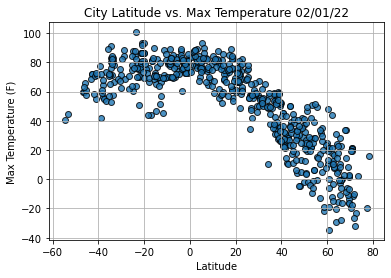

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

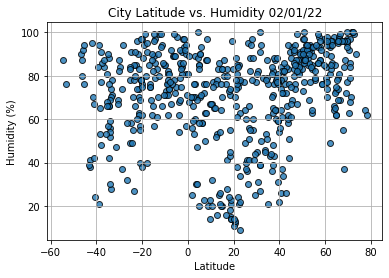

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

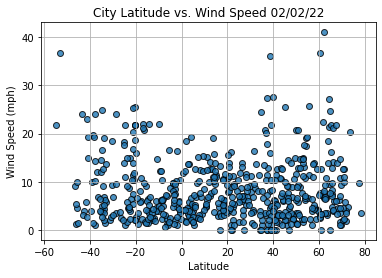

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()